### EDA

### Import Libraries and load the dataset

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/home/bbm/Documents/MachineLearningRating_v3.csv")
print(data.head)

/tmp/ipykernel_4583/1562313619.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/bbm/Documents/MachineLearningRating_v3.csv")


<bound method NDFrame.head of          UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        C

### Plot missing values

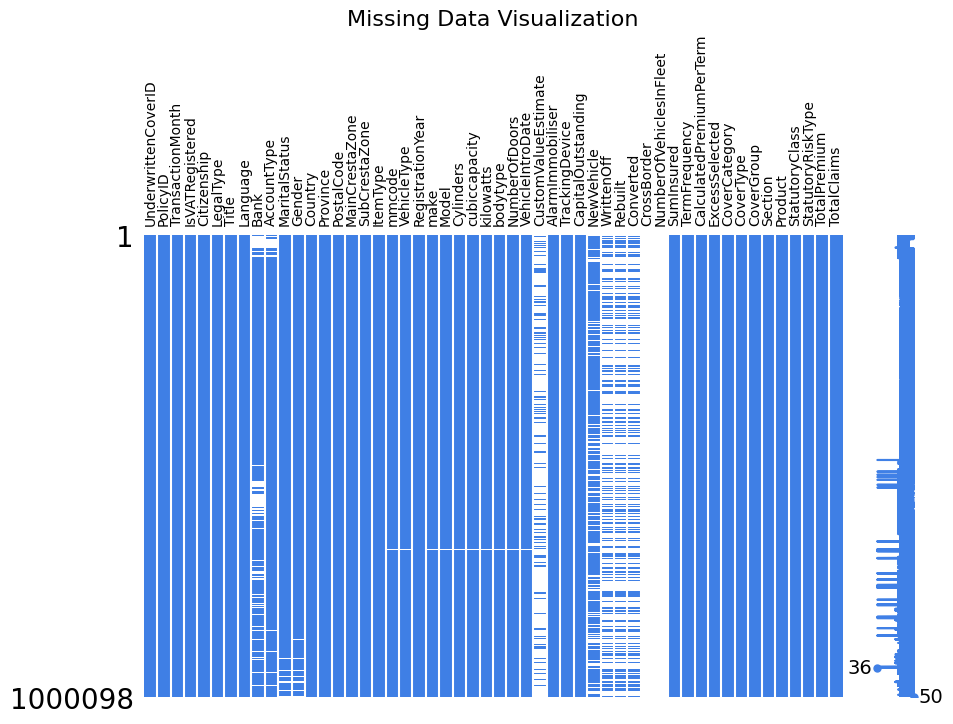

In [14]:
import missingno as msno

msno.matrix(data, figsize=(10, 6), color=(0.25, 0.5, 0.9))  # Adjust size and color
plt.title("Missing Data Visualization", fontsize=16)

plt.xticks(
    range(data.shape[1]),          
    data.columns,                  
    rotation=90, fontsize=10        
)
plt.show()

### Data Summarization

In [15]:
print("Dataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

### Data Quality Assessment

In [16]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDo

In [19]:
data = data.dropna()

### Univariate Analysis

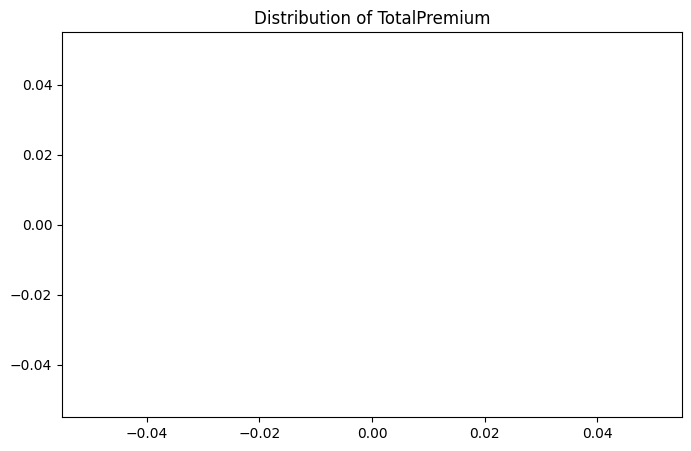

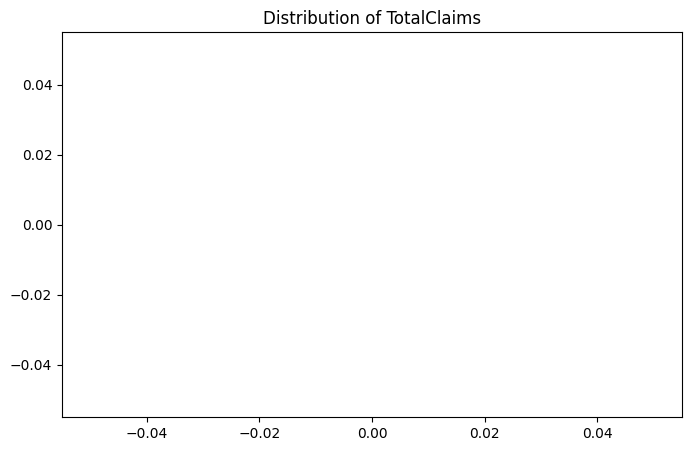

KeyError: 'ZipCode'

<Figure size 800x500 with 0 Axes>

In [21]:
numerical_cols = ["TotalPremium", "TotalClaims"]
categorical_cols = ["ZipCode", "AutoMake", "InsuranceCoverType"]

# Numerical Columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.show()

In [ ]:
# 4. Bivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=data, alpha=0.7)
plt.title("TotalPremium vs TotalClaims")
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.show()

# 5. Trends Over Geography
geo_trends = data.groupby("ZipCode")[["TotalPremium", "TotalClaims"]].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x="ZipCode", y="TotalPremium", data=geo_trends, label="TotalPremium")
sns.lineplot(x="ZipCode", y="TotalClaims", data=geo_trends, label="TotalClaims")
plt.title("Trends Over Geography (ZipCode)")
plt.xlabel("ZipCode")
plt.ylabel("Values")
plt.legend()
plt.show()

# 6. Outlier Detection
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# 7. Creative Visualizations
# Example: Monthly Premium Trends
if "TransactionMonth" in data.columns:
    monthly_trends = data.groupby("TransactionMonth")[["TotalPremium", "TotalClaims"]].sum()
    monthly_trends.plot(kind="bar", figsize=(12, 6))
    plt.title("Monthly Trends of Premiums and Claims")
    plt.xlabel("Month")
    plt.ylabel("Total")
    plt.show()
